In [1]:
import pandas as pd # pour la manipulation de tableaux numériques et l'analyse de données
import numpy as np # pour manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
import matplotlib.pyplot as plt  # permet de tracer et visualiser des données sous formes de graphiques.
import seaborn as sns # Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib . Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.

PREPROCESSING

In [2]:
# On importe le csv application_data
df = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_Originaux/application_data.csv')
# On indique vouloir garder toutes les colonnes
pd.set_option('display.max_columns',None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# On vérifie le pourcentage de valeurs manquantes par colonnne et on indique vouloir garder toutes les lignes
pd.set_option('display.max_rows',None)
round(df.isnull().sum() / df.shape[0] * 100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [4]:
# On sélectionne les colonnes qui nous intéressent

df = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_Originaux/application_data.csv') [['SK_ID_CURR','TARGET','DAYS_BIRTH','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_CHILDREN','NAME_TYPE_SUITE','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','DAYS_EMPLOYED','FLAG_EMP_PHONE','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','FLAG_OWN_CAR','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]
df.rename(columns={'SK_ID_CURR': 'id_client', 'TARGET': 'cible','DAYS_BIRTH':'age','CODE_GENDER': 'genre',
                   'NAME_EDUCATION_TYPE':'niveau_etude','NAME_FAMILY_STATUS':'statut_matrimonial',
                   'CNT_CHILDREN':'nombre_enfants','NAME_TYPE_SUITE':'accompagnant',
                   'AMT_INCOME_TOTAL':'total_revenus','NAME_INCOME_TYPE':'type_revenu',
                   'OCCUPATION_TYPE':'categorie_pro','ORGANIZATION_TYPE':'type_entreprise', 
                   'DAYS_EMPLOYED':'anciennete','FLAG_EMP_PHONE':'telephone_pro',
                   'FLAG_OWN_REALTY':'proprietaire','NAME_HOUSING_TYPE':'type_logement',
                   'FLAG_OWN_CAR':'possede_voiture','DAYS_REGISTRATION':'anciennete_banque',
                   'DAYS_ID_PUBLISH':'mise_a_jour_documents',},inplace=True)

pd.set_option('display.max_columns',None)
df.head()
             

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,-9461,M,Secondary / secondary special,Single / not married,0,Unaccompanied,202500.0,Working,Laborers,Business Entity Type 3,-637,1,Y,House / apartment,N,-3648.0,-2120
1,100003,0,-16765,F,Higher education,Married,0,Family,270000.0,State servant,Core staff,School,-1188,1,N,House / apartment,N,-1186.0,-291
2,100004,0,-19046,M,Secondary / secondary special,Single / not married,0,Unaccompanied,67500.0,Working,Laborers,Government,-225,1,Y,House / apartment,Y,-4260.0,-2531
3,100006,0,-19005,F,Secondary / secondary special,Civil marriage,0,Unaccompanied,135000.0,Working,Laborers,Business Entity Type 3,-3039,1,Y,House / apartment,N,-9833.0,-2437
4,100007,0,-19932,M,Secondary / secondary special,Single / not married,0,Unaccompanied,121500.0,Working,Core staff,Religion,-3038,1,Y,House / apartment,N,-4311.0,-3458


In [5]:
# On cherche a remplacer les variables catégorielles (discètes) par des variables numériques (continues)
# Lorsqu'on fera de la visualisation, on fera un mapping inverse

df.genre=df.genre.replace(["M","F","XNA"],[0,1,2])
df.niveau_etude=df.niveau_etude.replace(['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree'],[0,1,2,3,1])
df.statut_matrimonial=df.statut_matrimonial.replace(['Single / not married','Married','Civil marriage','Widow','Separated','Unknown'],[0,1,2,3,4,5])
df.accompagnant=df.accompagnant.replace(['Unaccompanied','Family','Spouse, partner','Children','Other_A','Other_B','Group of people'],[0,1,2,3,4,4,5])
df.type_revenu=df.type_revenu.replace(['Working','State servant','Commercial associate','Pensioner','Unemployed','Student','Businessman','Maternity leave'],[0,1,2,3,4,5,6,7])
df.categorie_pro=df.categorie_pro.replace(['Laborers','Core staff','Accountants','Managers','Drivers','Sales staff','Cleaning staff','Cooking staff','Private service staff','Medicine staff','Security staff','High skill tech staff','Waiters/barmen staff','Low-skill Laborers','Realty agents','Secretaries','IT staff','HR staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
df.type_entreprise=df.type_entreprise.replace(['Business Entity Type 3','School','Government','Religion','Other','XNA','Electricity','Medicine','Business Entity Type 2','Self-employed','Transport: type 2','Construction','Housing','Kindergarten','Trade: type 7','Industry: type 11','Military','Services','Security Ministries','Transport: type 4','Industry: type 1','Emergency','Security','Trade: type 2','University','Transport: type 3','Police','Business Entity Type 1','Postal','Industry: type 4','Agriculture','Restaurant','Culture','Hotel','Industry: type 7','Trade: type 3','Industry: type 3','Bank','Industry: type 9','Insurance','Trade: type 6','Industry: type 2','Transport: type 1','Industry: type 12','Mobile','Trade: type 1','Industry: type 5','Industry: type 10','Legal Services','Advertising','Trade: type 5','Cleaning','Industry: type 13','Trade: type 4','Telecom','Industry: type 8','Realtor','Industry: type 6'],[8,12,12,1,0,0,6,3,8,2,9,6,5,5,10,11,12,7,12,9,11,3,12,10,12,9,12,8,12,11,6,7,12,7,11,10,11,4,11,4,10,11,9,11,7,10,11,11,12,7,10,5,11,10,7,11,7,11])
df.proprietaire=df.proprietaire.replace(["Y","N"],[0,1])
df.type_logement=df.type_logement.replace(['House / apartment','Rented apartment','With parents','Municipal apartment','Office apartment','Co-op apartment'],[0,1,2,3,4,0])
df.possede_voiture=df.possede_voiture.replace(["Y","N"],[0,1])


df.head(20)

# Refaire avec factorize de pandas 

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,-9461,0,0,0,0,0.0,202500.000,0,0.0,8,-637,1,0,0,1,-3648.0,-2120
1,100003,0,-16765,1,1,1,0,1.0,270000.000,1,1.0,12,-1188,1,1,0,1,-1186.0,-291
2,100004,0,-19046,0,0,0,0,0.0,67500.000,0,0.0,12,-225,1,0,0,0,-4260.0,-2531
3,100006,0,-19005,1,0,2,0,0.0,135000.000,0,0.0,8,-3039,1,0,0,1,-9833.0,-2437
4,100007,0,-19932,0,0,0,0,0.0,121500.000,0,1.0,1,-3038,1,0,0,1,-4311.0,-3458
5,100008,0,-16941,0,0,1,0,2.0,99000.000,1,0.0,0,-1588,1,0,0,1,-4970.0,-477
6,100009,0,-13778,1,1,1,1,0.0,171000.000,2,2.0,8,-3130,1,0,0,0,-1213.0,-619
7,100010,0,-18850,0,1,1,0,0.0,360000.000,1,3.0,0,-449,1,0,0,0,-4597.0,-2379
8,100011,0,-20099,1,0,1,0,3.0,112500.000,3,NaN,0,365243,0,0,0,1,-7427.0,-3514
9,100012,0,-14469,0,0,0,0,0.0,135000.000,0,0.0,6,-2019,1,0,0,1,-14437.0,-3992


In [6]:
# Pourcentage de chaque NAME_TYPE_SUITE
#df.NAME_TYPE_SUITE.value_counts(normalize= True)

In [7]:
# On compte les valeurs distinctes dans la colonne type_entreprise
df['type_logement'].value_counts()

0    273990
2     14840
3     11183
1      4881
4      2617
Name: type_logement, dtype: int64

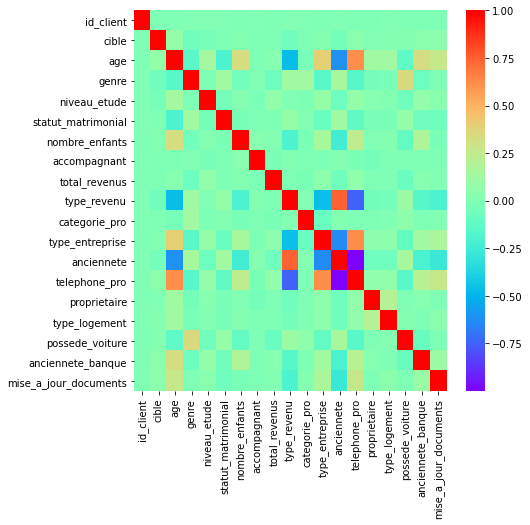

In [12]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(7, 7)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [8]:
df1 = df[['cible', 'type_logement','niveau_etude']][df.niveau_etude==3]
df1.head()

,cible,type_logement,niveau_etude
495,0,0,3
500,0,0,3
501,0,2,3
571,0,0,3
585,0,2,3


In [9]:
df1.describe()

,cible,type_logement,niveau_etude
count,3816.000000,3816.000000,3816.0
mean,0.109277,0.397799,3.0
std,0.312027,0.959486,0.0
min,0.000000,0.000000,3.0
25%,0.000000,0.000000,3.0
50%,0.000000,0.000000,3.0
75%,0.000000,0.000000,3.0
max,1.000000,4.000000,3.0


In [10]:
import csv
df1.to_csv('logement_etude_MySQL.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

/Users/p-asalisbury/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


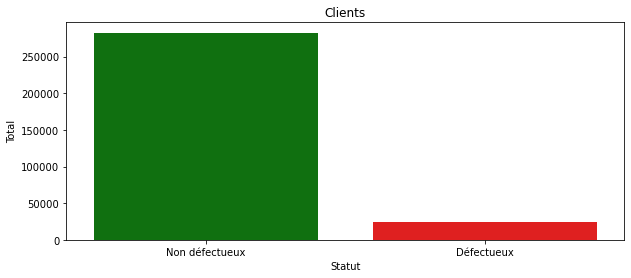

In [11]:
# Histogramme des client qui ont honnoré ou non leur crédit

fiabilite = df["cible"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Non défectueux','Défectueux']
sns.barplot(x,"cible",data = fiabilite,palette= ['g','r'])
plt.xlabel("Statut")
plt.ylabel("Total")
plt.title("Clients")
plt.show()

In [13]:
round(df['cible'].value_counts(normalize=True)*100,1)

0    91.9
1     8.1
Name: cible, dtype: float64

In [18]:
# On vérifie le pourcentage de valeurs manquantes par 
# colonnne et on indique vouloir garder toutes les lignes
pd.set_option('display.max_rows',None)
round(df.isnull().sum() / df.shape[0] * 100,2)

id_client                 0.00
cible                     0.00
age                       0.00
genre                     0.00
niveau_etude              0.00
statut_matrimonial        0.00
nombre_enfants            0.00
accompagnant              0.42
total_revenus             0.00
type_revenu               0.00
categorie_pro            31.35
type_entreprise           0.00
anciennete                0.00
telephone_pro             0.00
proprietaire              0.00
type_logement             0.00
possede_voiture           0.00
anciennete_banque         0.00
mise_a_jour_documents     0.00
dtype: float64

In [19]:
# On peut supprimer les NAN dans accompagnant (que 0.42 %)
# Aussi, on recode 'Other_A' et 'Other_B' en une variable 'Other' = 4
df = df.dropna(subset=['accompagnant'])

In [20]:
# On vérifie toutes les données uniques dans la colonne accompagnant, les NAN ont bien été supprimés
df['accompagnant'].unique()

array([0., 1., 2., 3., 4., 5.])

In [14]:
# On essaye de comprendre les XNA
df['cible'].value_counts()

0    282686
1     24825
Name: cible, dtype: int64

In [22]:
# On supprime les XNA
df = df[~(df.genre==2)] # ou df = df[df.genre!=2].head()

In [23]:
df['genre'].unique()

array([0, 1])

In [24]:
# Dans la colonne categorie_pro, on remplace les NaN par la valeur 99
# df['categorie_pro'] = df['categorie_pro'].fillna()
df['categorie_pro'] = df['categorie_pro'].replace(np.nan, 99).astype(int)
df.head(10)

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,-9461,0,0,0,0,0.0,202500.0,0,0,8,-637,1,0,0,1,-3648.0,-2120
1,100003,0,-16765,1,1,1,0,1.0,270000.0,1,1,12,-1188,1,1,0,1,-1186.0,-291
2,100004,0,-19046,0,0,0,0,0.0,67500.0,0,0,12,-225,1,0,0,0,-4260.0,-2531
3,100006,0,-19005,1,0,2,0,0.0,135000.0,0,0,8,-3039,1,0,0,1,-9833.0,-2437
4,100007,0,-19932,0,0,0,0,0.0,121500.0,0,1,1,-3038,1,0,0,1,-4311.0,-3458
5,100008,0,-16941,0,0,1,0,2.0,99000.0,1,0,0,-1588,1,0,0,1,-4970.0,-477
6,100009,0,-13778,1,1,1,1,0.0,171000.0,2,2,8,-3130,1,0,0,0,-1213.0,-619
7,100010,0,-18850,0,1,1,0,0.0,360000.0,1,3,0,-449,1,0,0,0,-4597.0,-2379
8,100011,0,-20099,1,0,1,0,3.0,112500.0,3,99,0,365243,0,0,0,1,-7427.0,-3514
9,100012,0,-14469,0,0,0,0,0.0,135000.0,0,0,6,-2019,1,0,0,1,-14437.0,-3992


In [27]:
# On change les valeurs négatives en valeurs positives
# On convertit aussi les jours en années 
# Enfin, on convertit les float en integer. 

df['age']=abs(df['age']/365).astype(int).round()
df['anciennete']=abs(df['anciennete']/365).astype(int).round()
df['anciennete_banque']=abs(df['anciennete_banque']/365).astype(int).round()
df['mise_a_jour_documents']=abs(df['mise_a_jour_documents']/365).astype(int).round()
df['total_revenus']=(df['total_revenus']).astype(int)


df.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0
2,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6
3,100006,0,52,1,0,2,0,0,135000,0,0,8,8,1,0,0,1,26,6
4,100007,0,54,0,0,0,0,0,121500,0,1,1,8,1,0,0,1,11,9


Identifier les valeurs abérantes 

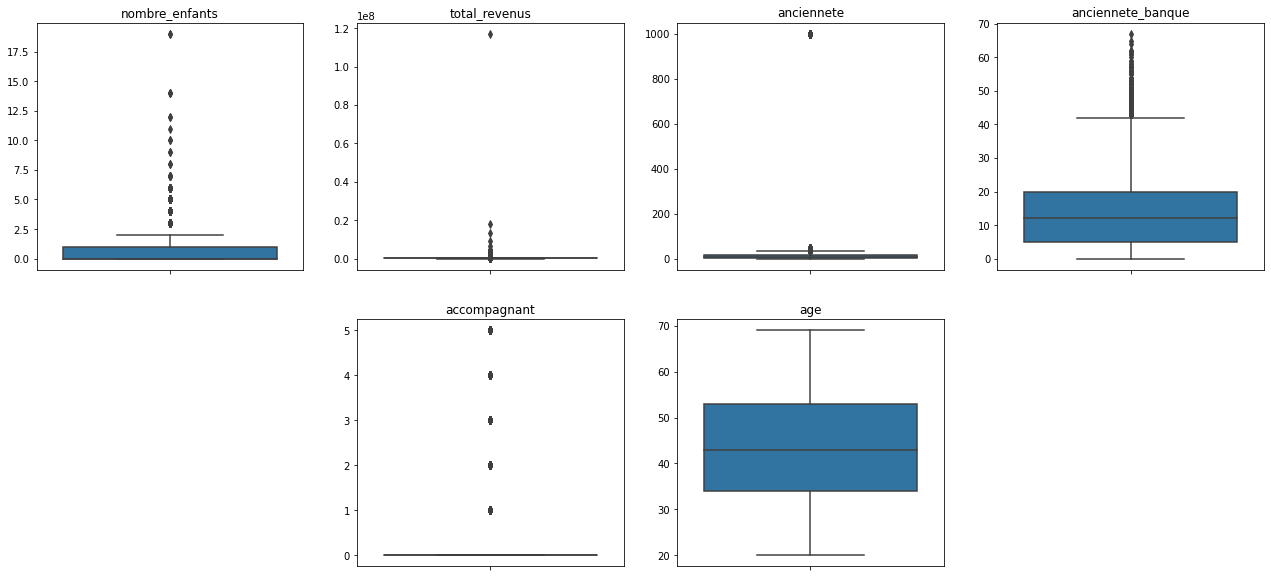

In [28]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['nombre_enfants','total_revenus','anciennete','anciennete_banque']
app_outlier_col_2 = ['accompagnant','age']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
    # Faire des comparaisons : les différents critères ex age + défauts 

In [29]:
# Il semble y avoir des valeurs abérantes dans les 4 colonnes suivantes, nous allons les observer de plus près. 

df[['nombre_enfants', 'total_revenus', 'anciennete', 'anciennete_banque']].describe()


,nombre_enfants,total_revenus,anciennete,anciennete_banque
count,306215.000000,3.062150e+05,306215.000000,306215.000000
mean,0.417004,1.687830e+05,185.145463,13.173799
std,0.722104,2.375179e+05,382.071936,9.645978
min,0.000000,2.565000e+04,0.000000,0.000000
25%,0.000000,1.125000e+05,2.000000,5.000000
50%,0.000000,1.476000e+05,6.000000,12.000000
75%,1.000000,2.025000e+05,15.000000,20.000000
max,19.000000,1.170000e+08,1000.000000,67.000000


# Appercu :

4 colonnes semblent comporter des valeurs abérantes



1) nombre_enfants

In [30]:
df.loc[df['nombre_enfants'] >10]

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
34545,140032,1,47,0,0,1,11,0,315000,0,3,0,0,1,1,0,0,10,2
80948,193853,0,38,1,0,1,12,1,337500,2,1,5,7,1,0,0,1,5,10
155369,280108,0,30,1,0,0,19,1,112500,0,12,7,5,1,0,0,1,8,2
171125,298322,0,38,1,0,1,12,1,225000,2,1,5,6,1,0,0,1,5,10
176011,303956,0,48,0,0,4,14,3,225000,0,4,2,4,1,0,0,0,19,3
183878,313127,0,55,1,0,1,14,0,45000,3,99,0,1000,0,1,0,0,34,10
265784,407877,0,28,1,1,0,19,0,112500,0,1,5,2,1,0,0,1,12,7
267998,410527,0,42,1,0,1,14,0,54000,0,3,12,1,1,1,0,1,17,11


In [31]:
# Tout est cohérent donc nous n'avons pas besoin de supprimer des lignes. 

2) total_revenus

In [32]:
# On vérifie la catégorie professionnelle des clients qui ont un revenu > 10 millions par an. 
# Il y a deux NaN qu'on peut supprimer.  Et un ouvrier qui pourrait avoir hérité d'une grosse somme 
# d'argent mais nous préférons le supprimer pour ne pas biaiser notre analyse avec une valeur extrême. 


df.loc[df['total_revenus'] >10000000]['categorie_pro']

12840      0
203693    99
246858    99
Name: categorie_pro, dtype: int64

In [33]:
## On remplace les valeurs abérantes par des NaN (>10 millions)
df.loc[df['total_revenus'] >10000000, 'total_revenus'] = np.nan

In [34]:
# On peut supprimer les lignes avec des NaN 
df = df.dropna(subset=['total_revenus'])

In [35]:
# On vérifie qu'elles ont bien été supprimées
df.loc[df['total_revenus'] >10000000]['categorie_pro']

Series([], Name: categorie_pro, dtype: int64)

3) anciennete

In [36]:
# Valeurs abérantes autour de 958 années dans la même entreprises. Nous allons donc supprimer ces entrées incorectes.


## Majority of the records with 365243 are without payment difficulties. May be it is a default or maxiumum value. 
## On remplace les valeurs abérantes par des NaN 
df.loc[df['anciennete'] >800, 'anciennete'] = np.nan


Text(0.5, 0, 'années')

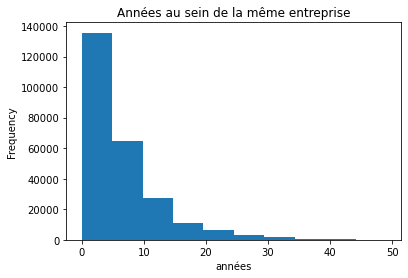

In [37]:
# On fait un histogramme

df['anciennete'].plot.hist(title = 'Années au sein de la même entreprise')
plt.xlabel('années')

In [38]:
# On vérifie le pourcentage de valeurs manquantes par colonnne et on indique vouloir garder toutes les lignes
pd.set_option('display.max_rows',None)
round(df.isna().sum() / application.shape[0] * 100,2)

id_client                 0.00
cible                     0.00
age                       0.00
genre                     0.00
niveau_etude              0.00
statut_matrimonial        0.00
nombre_enfants            0.00
accompagnant              0.00
total_revenus             0.00
type_revenu               0.00
categorie_pro             0.00
type_entreprise           0.00
anciennete               17.94
telephone_pro             0.00
proprietaire              0.00
type_logement             0.00
possede_voiture           0.00
anciennete_banque         0.00
mise_a_jour_documents     0.00
dtype: float64

In [39]:
# On peut supprimer les lignes avec des NaN dans anceienneté (17.94%)
df = df.dropna(subset=['anciennete'])

4) anciennete_banque

Text(0.5, 0, 'années')

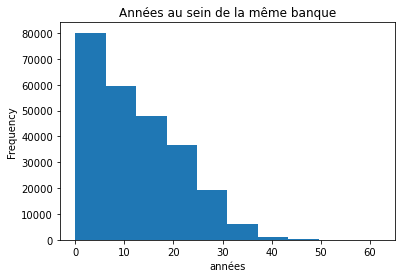

In [40]:
# On fait un histogramme

df['anciennete_banque'].plot.hist(title = 'Années au sein de la même banque')
plt.xlabel('années')

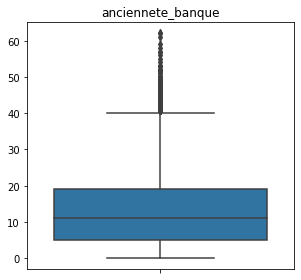

In [41]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['anciennete_banque']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [43]:
# On vérifie le pourcentage de valeurs manquantes par colonnne et on indique vouloir garder toutes les lignes
pd.set_option('display.max_rows',None)
round(df.isna().sum() / application.shape[0] * 100,2)

id_client                0.00
cible                    0.00
age                      0.00
genre                    0.00
niveau_etude             0.00
statut_matrimonial       0.00
nombre_enfants           0.00
accompagnant             0.00
total_revenus            0.00
type_revenu              0.00
categorie_pro            0.00
type_entreprise          0.00
anciennete               0.00
telephone_pro            0.00
proprietaire             0.00
type_logement            0.00
possede_voiture          0.00
anciennete_banque        0.14
mise_a_jour_documents    0.00
dtype: float64

In [44]:
# Tout parait cohérant, nul besoin de supprimer des données en fin de compte. 

In [45]:
df.dtypes

id_client                  int64
cible                      int64
age                        int64
genre                      int64
niveau_etude               int64
statut_matrimonial         int64
nombre_enfants             int64
accompagnant               int64
total_revenus            float64
type_revenu                int64
categorie_pro              int64
type_entreprise            int64
anciennete               float64
telephone_pro              int64
proprietaire               int64
type_logement              int64
possede_voiture            int64
anciennete_banque        float64
mise_a_jour_documents      int64
dtype: object

In [46]:
df= df.replace(np.nan, 99).astype(int)

In [47]:
df['total_revenus'] = df['total_revenus'].replace(np.nan, 99).astype(int)
df['anciennete'] = df['anciennete'].replace(np.nan, 99).astype(int)
df['anciennete_banque'] = df['anciennete_banque'].replace(np.nan, 99).astype(int)

In [48]:
df.dtypes

id_client                int64
cible                    int64
age                      int64
genre                    int64
niveau_etude             int64
statut_matrimonial       int64
nombre_enfants           int64
accompagnant             int64
total_revenus            int64
type_revenu              int64
categorie_pro            int64
type_entreprise          int64
anciennete               int64
telephone_pro            int64
proprietaire             int64
type_logement            int64
possede_voiture          int64
anciennete_banque        int64
mise_a_jour_documents    int64
dtype: object

In [49]:
df.describe()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
count,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.00000,2.510340e+05,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000,251034.000000
mean,278097.225762,0.086733,39.973255,0.623501,0.370886,1.191918,0.498506,0.26990,1.753093e+05,0.654589,19.263526,6.900344,6.040230,0.999952,0.320028,0.298713,0.625401,12.309930,7.183764
std,102813.763553,0.281444,10.032648,0.484508,0.609844,0.949120,0.763178,0.67221,1.044203e+05,0.892954,35.307903,3.653505,6.417738,0.006914,0.466488,0.854483,0.484020,9.521385,4.149930
min,100002.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189015.250000,0.000000,32.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.125000e+05,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000
50%,278037.500000,0.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.575000e+05,0.000000,4.000000,8.000000,4.000000,1.000000,0.000000,0.000000,1.000000,11.000000,7.000000
75%,367164.750000,0.000000,48.000000,1.000000,1.000000,1.000000,1.000000,0.00000,2.115000e+05,2.000000,10.000000,9.000000,8.000000,1.000000,1.000000,0.000000,1.000000,19.000000,11.000000
max,456255.000000,1.000000,69.000000,1.000000,4.000000,4.000000,19.000000,5.00000,9.000000e+06,7.000000,99.000000,12.000000,49.000000,1.000000,1.000000,5.000000,1.000000,99.000000,19.000000


In [50]:
import csv
df.to_csv('CLIENT_MySQL.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [51]:
df.shape

(251034, 19)

In [52]:
df.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0
2,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6
3,100006,0,52,1,0,2,0,0,135000,0,0,8,8,1,0,0,1,26,6
4,100007,0,54,0,0,0,0,0,121500,0,1,1,8,1,0,0,1,11,9
